# **🚢📦 Deliverable: Titanic Baseline Classifier**

**🎯 Task:**  
Train a **baseline classifier** using a `sklearn` pipeline on the **Titanic dataset** that predicts whether a passenger **lives or dies**.  

- Use the Titanic dataset (available via `seaborn`).  
- Build an end-to-end pipeline (preprocessing + model).  
- Evaluate your model on a held-out test set.  
- Report baseline metrics in mlflow: accuracy, precision, recall, and f1-score. 
- Alias a model for production with @prod. 

**📤 Submission:**  
When your model is ready, **deploy it to Render** and obtain a reachable Public API URL. \
Submit your API URL using the following 👉 [Airtable](https://airtable.com/appbzvXorTGCwSsy9/pagYPfSy0uxXrdsUL/form)

**⏳ Timeline:**  
You have **1 week** to complete this deliverable. \
Submissions to the `Airtable` will be available until **August 29, 2025 @11:59 PM**

**🏅 Certification:**  
Upon **successful completion**, you will be awarded a **Certificate of Achievement** for this workshop. 

---

## **1. Data Ingestion**

In [24]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import mlflow

In [23]:
pd.set_option("display.max_columns", None)

# Load titanic dataset
titanic = sns.load_dataset("titanic")

print(f"ROWS, COLUMNS: {titanic.shape}")
titanic.head()

ROWS, COLUMNS: (891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## **2. Data Preparation**

1. Create `pre-processing` Pipeline: 
- Impute (replace) missing numerical (median) and categorical (most frequent) \
    values in the preprocessing pipeline
- One-hot encode categoricals
- Standardize numeric features 
2. Split Train/Test split (80/20)

> You will need to remove or transform feature columns because of redundancy (e.g., `adult_male` is a column but we already have a `sex` column....`pclass` and `class`....`parch` and `sibsp` and `alone`....does it make sense to include `alive` if we're predicting `survived`?)

In [8]:
# Count missing values
print(f"{titanic.isna().sum()}\n")

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64



In [9]:
# Summary of numeric columns 
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [7]:
# Unique values for categorical columns
for col in titanic.select_dtypes("object"):
    print(f"{col}: {titanic[col].unique()}")

# Summary of categorical columns 
titanic.describe(include="object").T

sex: ['male' 'female']
embarked: ['S' 'C' 'Q' nan]
who: ['man' 'woman' 'child']
embark_town: ['Southampton' 'Cherbourg' 'Queenstown' nan]
alive: ['no' 'yes']


,count,unique,top,freq
sex,891,2,male,577
embarked,889,3,S,644
who,891,3,man,537
embark_town,889,3,Southampton,644
alive,891,2,no,549


In [ ]:
# View class imbalance
titanic["survived"].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [ ]:
# -----------CODE HERE-------------

Numeric: ['pclass', 'age', 'sibsp', 'parch', 'fare']
Categorical: ['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alone']
TRAIN SET: (712, 13) survived
0    0.62
1    0.38
Name: proportion, dtype: float64
TEST SET: (179, 13) survived
0    0.61
1    0.39
Name: proportion, dtype: float64


## **3. Model Training & EDA**

1. Explore dataset through visualizations
- Check class imbalance with bar chart for `survived`
- Compare surival rate by `sex`, `class`, and `embarked`
- Plot histograms/boxplots of `age` and `fare` split by `survived`
- Show pairplot for correlations between numeric features

2. Build a `Pipeline` that chains the **preprocessor** 
    and a **baseline model** like `LogisticRegression` or `RandomForestClassifer`

3. Train on the 80 % train set and evaluate on the held‑out 20 % test set

4. Save metrics (i.e., accuracy, test_f1_macro, test_recall_macro, test_precision_macro) for logging


TEST REPORT:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       110
           1       0.79      0.75      0.77        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



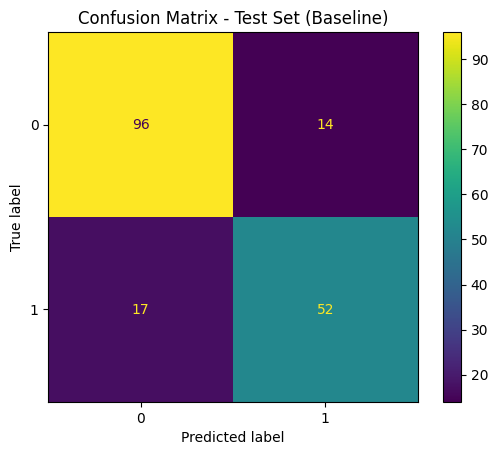

In [ ]:
# -----------CODE HERE-------------

## **4. DVC not required for deliverable**

## **5. Tracking experiment in MLflow**

1. Start mlflow server locally: `mlflow server` or `mlflow ui` (be aware of port conflicts - MacOS uses 5000 for Airplay for some reason)
2. Track **at least** 1 experiment in MLflow which logs: 
- Test Metrics
- Hyperparameters 
- Run tags for dataset, framework, and owner (you)
- Model - registers under name `titanic-classifier` (or any name you want)
- Model tags for run ID and run name (if you make explicit)

3. Set @prod alias to one run (if running multiple experiments, maybe rank with metrics, then proceed with this step...)
- this is for practice (our deployed API doesn't point to the @prod alias)

In [ ]:
# -----------CODE HERE-------------

2025/08/21 22:31:42 INFO mlflow.tracking.fluent: Experiment with name 'titanic-classifier' does not exist. Creating a new experiment.


2025/08/21 22:31:42 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/home/kaipatel/dmls-mlops-workshop/.venv/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/08/21 22:31:43 WARNING mlflow.models.signature: Failed to infer the model signature from the input example

🏃 View run stately-crab-541 at: http://localhost:5000/#/experiments/987949012121456934/runs/d6ac63a6e8804c63b0a7ae1dcddd0b95
🧪 View experiment at: http://localhost:5000/#/experiments/987949012121456934


Created version '1' of model 'titanic_classifer_baseline'.


## **6. Test Your model**

1. Navigate to the local `mlartifacts` directory that should have propogated \
into your root if you ran MLflow

2. Choose and copy the **artifact folder** for the run you want to deploy.
- It will be nested in `mlartifacts`, so ensure that you copy the top-level directory `artifacts` which contains files like `model.pkl`, `MLmodel`, `conda.yaml`, ...

3. Paste this `artifacts` folder into the `deliverable/api` directory 

4. Run the api locally
    ```bash
    uvicorn app:app --reload --port 8000
    ```

5. Test the API
    ```bash
    python deliverable/api/test_app.py 
    ```
    ```bash
    python3 deliverable/api/test_app.py 
    ``` 

## **7. Deploy Your Model in Render**

1. **Preview `render.yaml` at the repo root** \
  We will use this Blueprint file (similar to docker-compose.yml) to deploy our FastAPI

2. **Commit and push your work to your forked `cert/deliverable` branch to GitHub**
  ```bash
    # From your repo root, commit all changes
    git add render.yaml
    git add deliverable/api/

    git commit -m "Certificate deliverable: Titanic API + artifacts/ + render.yaml"
    git push origin cert/deliverable
  ```

3. **Signup or login to [Render](https://render.com)**

4. **In Render: New → Blueprint → point to the `cert/deliverable` branch**
  
    #### 💳 Note on Payment Info
    Render will ask you to enter payment information when you create an account.  
    👉 **Don’t worry — you will not be charged if you stay on the Free plan.**

    - A **free Web Service** with your deployed FastAPI app (even with the model artifact included) is covered by Render’s free tier.  
    - Render only charges if you upgrade to a paid plan or run multiple services beyond free limits.  
    - You can always check your **Plan & Billing** page in Render to confirm you are on the **Free** plan.

5. **Review settings → choose Free plan → Apply**

6. **Wait for build → deploy → health check**  
   Once it passes, you’ll get a public URL like:  
   `https://titanic-api-xxx.onrender.com`

7. **Test your deployed model**

    ```bash
    curl -s -X POST "<PUBLIC_URL>/predict" \
      -H "Content-Type: application/json" \
      -d '{
        "pclass": 1,
        "sex": "female",
        "age": 38,
        "sibsp": 1,
        "parch": 0,
        "fare": 71.2833,
        "embarked": "C",
        "class": "First",
        "who": "woman",
        "adult_male": false,
        "deck": "C",
        "embark_town": "Cherbourg",
        "alone": false
      }'
    ```


## **8. Submit your Public API URL**

1. Navigate to the [Airtable](https://airtable.com/appbzvXorTGCwSsy9/pagYPfSy0uxXrdsUL/form)

2. Submit your API URL obtained from Render for testing